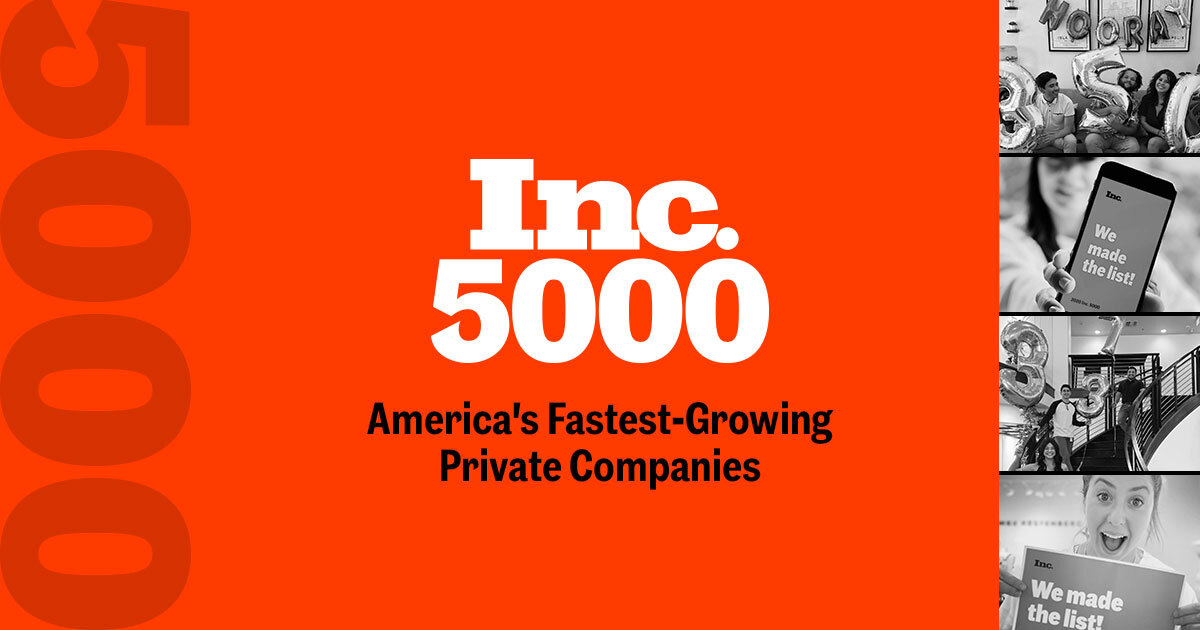

In [2]:
from PIL import Image
Image.open("G:\Inc5000_NationalsApplication_SocialShare_2021.jpg")

## RECOMMENDED ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ps
import seaborn as sns

In [4]:
df = pd.read_csv("G:\PROJECTS\INC 500\INC 5000 Companies 2019.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


In [7]:
df1.dtypes

rank                  int64
profile              object
name                 object
url                  object
state                object
revenue              object
growth_%            float64
industry             object
workers             float64
previous_workers      int64
founded               int64
yrs_on_list           int64
metro                object
city                 object
dtype: object

In [8]:
df1.shape

(5012, 14)

In [9]:
df1.head()

rank                                   profile               name  \
0     1      https://www.inc.com/profile/freestar           Freestar   
1     2   https://www.inc.com/profile/freightwise        FreightWise   
2     3  https://www.inc.com/profile/ceces-veggie  Cece's Veggie Co.   
3     4      https://www.inc.com/profile/ladyboss           LadyBoss   
4     5        https://www.inc.com/profile/perpay             Perpay   

                         url state       revenue    growth_%  \
0        http://freestar.com    AZ  36.9 Million  36680.3882   
1  http://freightwisellc.com    TN  33.6 Million  30547.9317   
2   http://cecesveggieco.com    TX  24.9 Million  23880.4852   
3        http://ladyboss.com    NM  32.4 Million  21849.8925   
4          http://perpay.com    PA  22.5 Million  18166.4070   

                       industry  workers  previous_workers  founded  \
0       Advertising & Marketing     40.0                 5     2015   
1    Logistics & Transportation     39.0                 8     2015   
2               Food & Beverage    190.0                10     2015   
3  Consumer Products & Services     57.0                 2     2014   
4                        Retail     25.0                 6     2014   

   yrs_on_list         metro          city  
0            1       Phoenix       Phoenix  
1            1     Nashville     Brentwood  
2            1        Austin        Austin  
3            1           NaN   Albuquerque  
4            1  Philadelphia  Philadelphia

In [10]:
df1.describe()

rank      growth_%        workers  previous_workers  \
count  5012.000000   5012.000000    5011.000000       5012.000000   
mean   2499.628292    454.680059     242.783077        111.687151   
std    1443.232009   1284.288709    2800.165478       1073.878175   
min       1.000000     52.169100       0.000000          1.000000   
25%    1249.750000     90.562500      22.000000          8.000000   
50%    2497.500000    157.530650      48.000000         20.000000   
75%    3749.250000    330.427250     116.000000         50.000000   
max    5000.000000  36680.388200  155000.000000      53000.000000   

           founded  yrs_on_list  
count  5012.000000  5012.000000  
mean   2005.445531     2.813647  
std      30.310632     2.265986  
min       0.000000     1.000000  
25%    2003.000000     1.000000  
50%    2009.000000     2.000000  
75%    2012.000000     4.000000  
max    2016.000000    14.000000

## dropping unnecessary columns

In [11]:
df.drop(['profile', 'url','metro'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   name              5012 non-null   object 
 2   state             5012 non-null   object 
 3   revenue           5012 non-null   object 
 4   growth_%          5012 non-null   float64
 5   industry          5012 non-null   object 
 6   workers           5011 non-null   float64
 7   previous_workers  5012 non-null   int64  
 8   founded           5012 non-null   int64  
 9   yrs_on_list       5012 non-null   int64  
 10  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 430.8+ KB


## Checking for null values and handling them

In [13]:
df.isna().sum()

rank                0
name                0
state               0
revenue             0
growth_%            0
industry            0
workers             1
previous_workers    0
founded             0
yrs_on_list         0
city                0
dtype: int64

In [14]:
df.dropna(subset="workers",inplace = True)

In [15]:
df.isna().sum()

rank                0
name                0
state               0
revenue             0
growth_%            0
industry            0
workers             0
previous_workers    0
founded             0
yrs_on_list         0
city                0
dtype: int64

In [16]:
df.shape

(5011, 11)

## What's the average revenue among companies on the list? Broken down by industry?

In [17]:
df["revenue"].unique()

array(['36.9 Million', '33.6 Million', '24.9 Million', ..., '1.4 Billion',
       '93 Million', '154.4 Million'], dtype=object)

In [18]:
df["revenue"]=df["revenue"].replace({'Million':" ", "Billion":'*1000'},regex=True).map(pd.eval)

In [19]:
df["revenue"].unique()

array([  36.9,   33.6,   24.9, ..., 1400. ,   93. ,  154.4])

In [20]:
df.rename(columns={'revenue':'revenue_in_millions'},inplace=True)

In [21]:
df.groupby("industry")['revenue_in_millions'].mean().sort_values(ascending=False)

industry
Security                        123.747761
Health                          109.330056
Logistics & Transportation      101.293011
Energy                           80.221795
Human Resources                  73.582166
Consumer Products & Services     72.295223
Retail                           66.552761
Government Services              59.391949
Insurance                        58.742857
Construction                     58.422571
Telecommunications               41.825316
Financial Services               40.004184
Food & Beverage                  39.855906
Real Estate                      34.061111
Manufacturing                    33.303315
Engineering                      32.954321
Computer Hardware                31.178125
Business Products & Services     28.601829
Travel & Hospitality             26.736842
IT Management                    22.577536
Environmental Services           22.506977
Software                         21.573970
IT System Development            21.088333
Ed

In [22]:
industries_average_revenue = df.groupby("industry")['revenue_in_millions'].mean().sort_values(ascending=False)

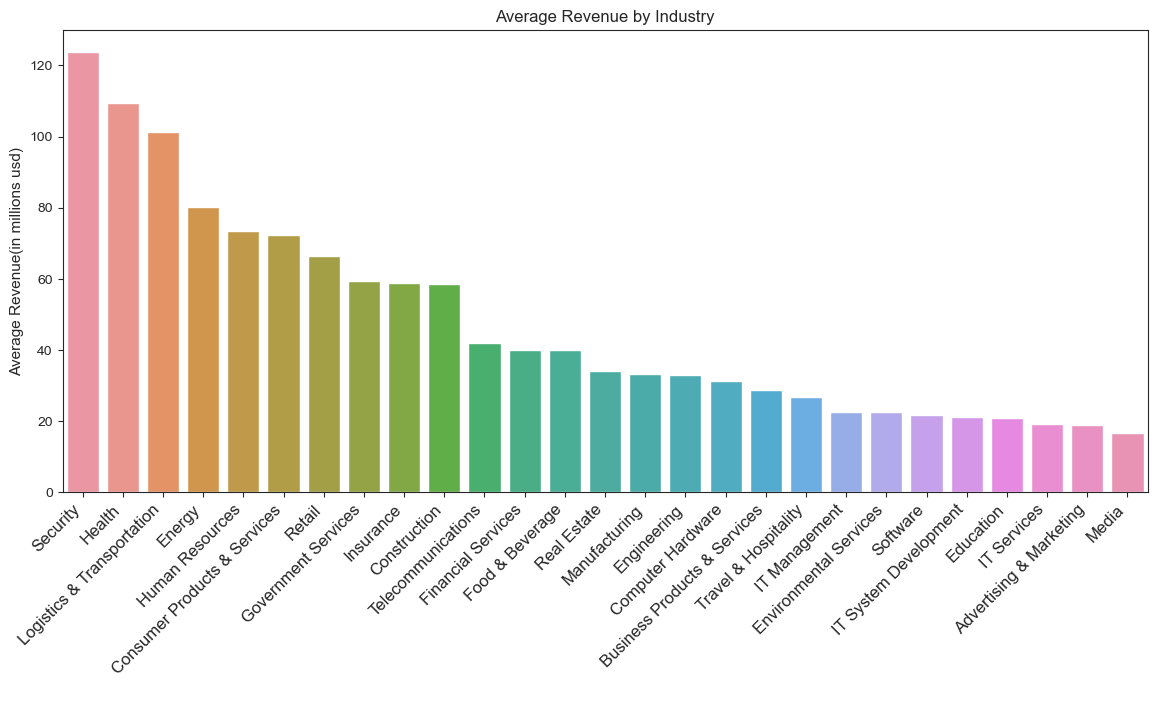

In [23]:
import matplotlib.pyplot as plt
sns.set_style("ticks")
plt.figure(figsize=(14,6))
sns.barplot(x=industries_average_revenue.index, y=industries_average_revenue.values)
plt.title('Average Revenue by Industry')
plt.ylabel('Average Revenue(in millions usd)',fontsize=11)
plt.xlabel(' ',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()

## Which industries are most and least represented in the list?


In [24]:
df["industry"].value_counts()

Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: industry, dtype: int64

In [25]:
top_5_industries = df["industry"].value_counts().sort_values(ascending=False).head()

In [26]:
bottom_5_industries = df["industry"].value_counts().sort_values(ascending=False).tail()

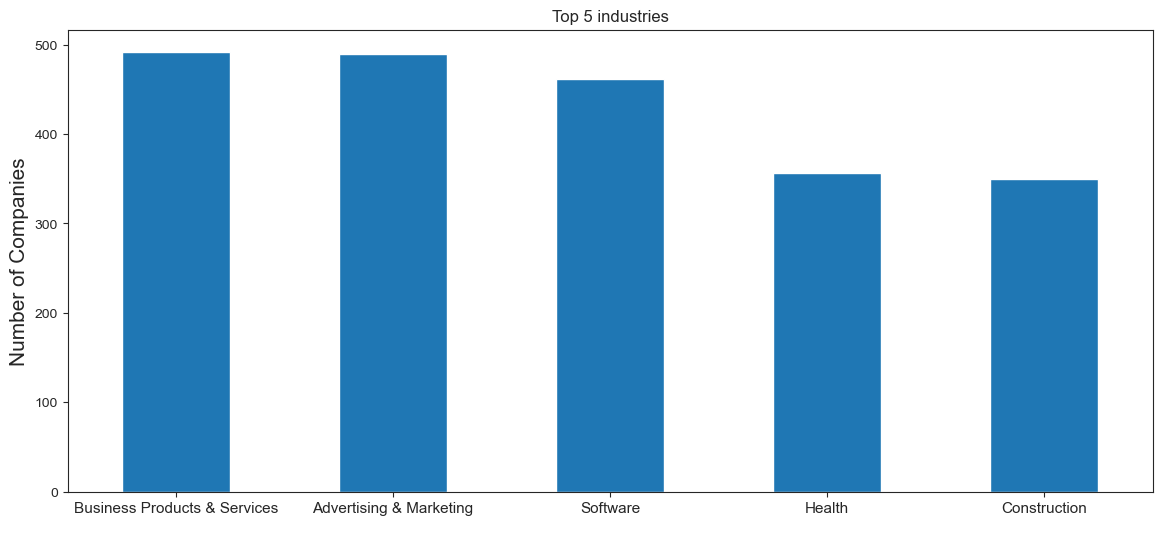

In [27]:
top_5_industries.plot(figsize=(14,6),kind="bar",title="Top 5 industries",rot=45)
plt.ylabel('Number of Companies',fontsize=15)
plt.xticks(rotation=0,fontsize=11)
plt.xlabel(' ',fontsize=15)
plt.show()


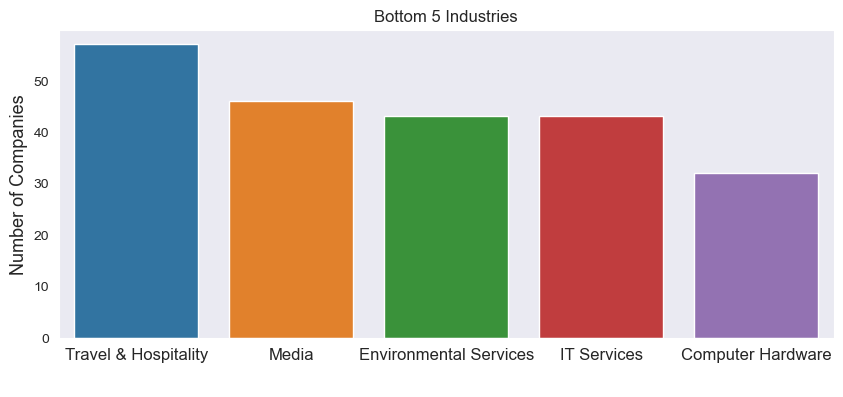

In [28]:
sns.set_style("dark")
plt.figure(figsize=(10,4))
sns.barplot(x=bottom_5_industries.index, y=bottom_5_industries.values)
plt.title("Bottom 5 Industries")
plt.ylabel('Number of Companies',fontsize=13)
plt.xlabel(' ',fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.show()

#### "Business Products & Services" appered maximum 492 times in the list and "Computer Hardware" is appered 32 times in the list.

## Which industries saw the largest average growth rate?


In [29]:
df.groupby("industry")["growth_%"].mean().sort_values(ascending=False)

industry
Logistics & Transportation      717.563346
Consumer Products & Services    687.534860
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Advertising & Marketing         486.685136
Government Services             485.308360
Environmental Services          458.554665
Financial Services              423.942329
Real Estate                     417.554633
Media                           413.729200
IT System Development           385.909106
Education                       384.560157
Construction                    358.093255
Travel & Hospitality            346.417214
Manufacturing                   333.701503
Business Products & Services    313.472373
Insurance                       306.150356
Hu

In [30]:
top_growthrate_industries = df.groupby("industry")["growth_%"].mean().sort_values(ascending=False).head(10)

Text(0.5, 0, ' ')

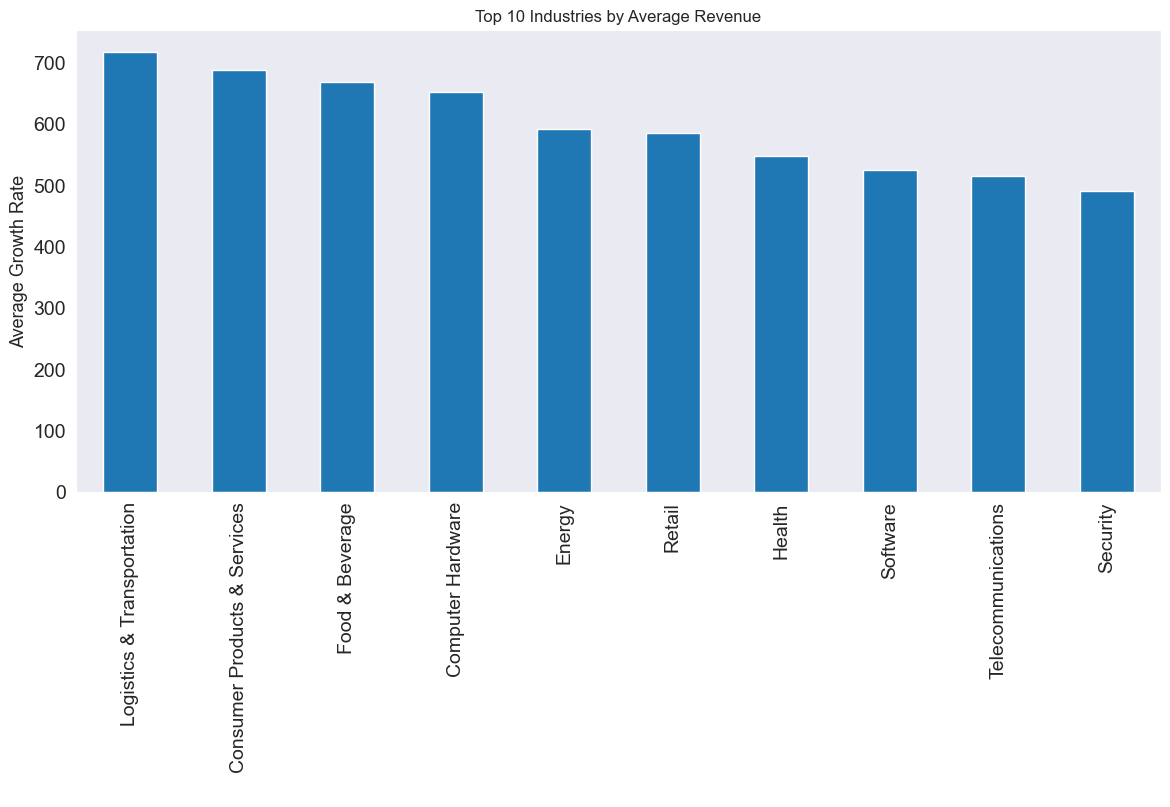

In [31]:
top_growthrate_industries.plot(figsize=(14,6),kind="bar",title="Top 10 Industries by Average Revenue",rot=90,fontsize=14)
plt.ylabel('Average Growth Rate',fontsize=13)
plt.xlabel(' ',fontsize=15)

#### "Logistics & Transportation"  shows the maximum average growth rate of  717%(approx) .

## Which companies had the largest increase in staff/new hires?

In [32]:
df["workers_difference"]=df["workers"]-df["previous_workers"]

In [33]:
df.groupby("name")["workers_difference"].sum().sort_values(ascending=False).head(10)

name
Allied Universal           118531.0
Alorica                     43000.0
Infiniti HR                 37145.0
CircusTrix                  13739.0
ScribeAmerica               11641.0
TaskUs                       9198.0
Freddy's Frozen Custard      6494.0
Pathway Vet Alliance         4174.0
Four Foods Group             3500.0
Pacific Dental Services      3356.0
Name: workers_difference, dtype: float64

In [34]:
top10_inc_staff = df.groupby("name")["workers_difference"].sum().sort_values(ascending=False).head(10)

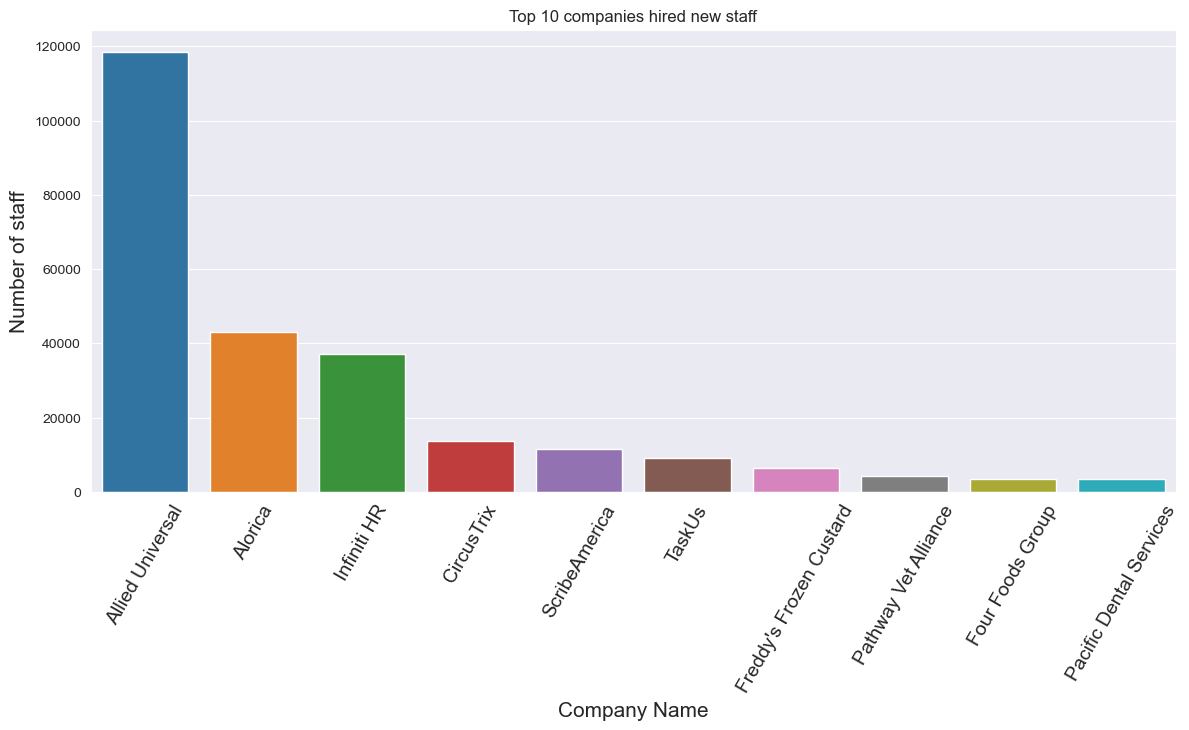

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sns.barplot(x=top10_inc_staff.index, y=top10_inc_staff.values)
plt.title("Top 10 companies hired new staff")
plt.ylabel('Number of staff',fontsize=15)
plt.xlabel('Company Name',fontsize=15)
plt.xticks(rotation=60,fontsize=14)
plt.show()

In [36]:
df.groupby("name")["workers_difference"].sum().sort_values(ascending=False).tail(10)

name
NCWC                                     -71.0
Atlas Oil Company                        -73.0
Ctems                                    -80.0
Zefr                                     -86.0
Centrify                                -127.0
Integrity Services                      -150.0
First American Payment Systems          -243.0
Akorbi                                  -300.0
Prime Therapeutics                      -600.0
IDS International Government Services   -682.0
Name: workers_difference, dtype: float64

In [37]:
bottom10_layoff_staff = df.groupby("name")["workers_difference"].sum().sort_values(ascending=False).tail(10)

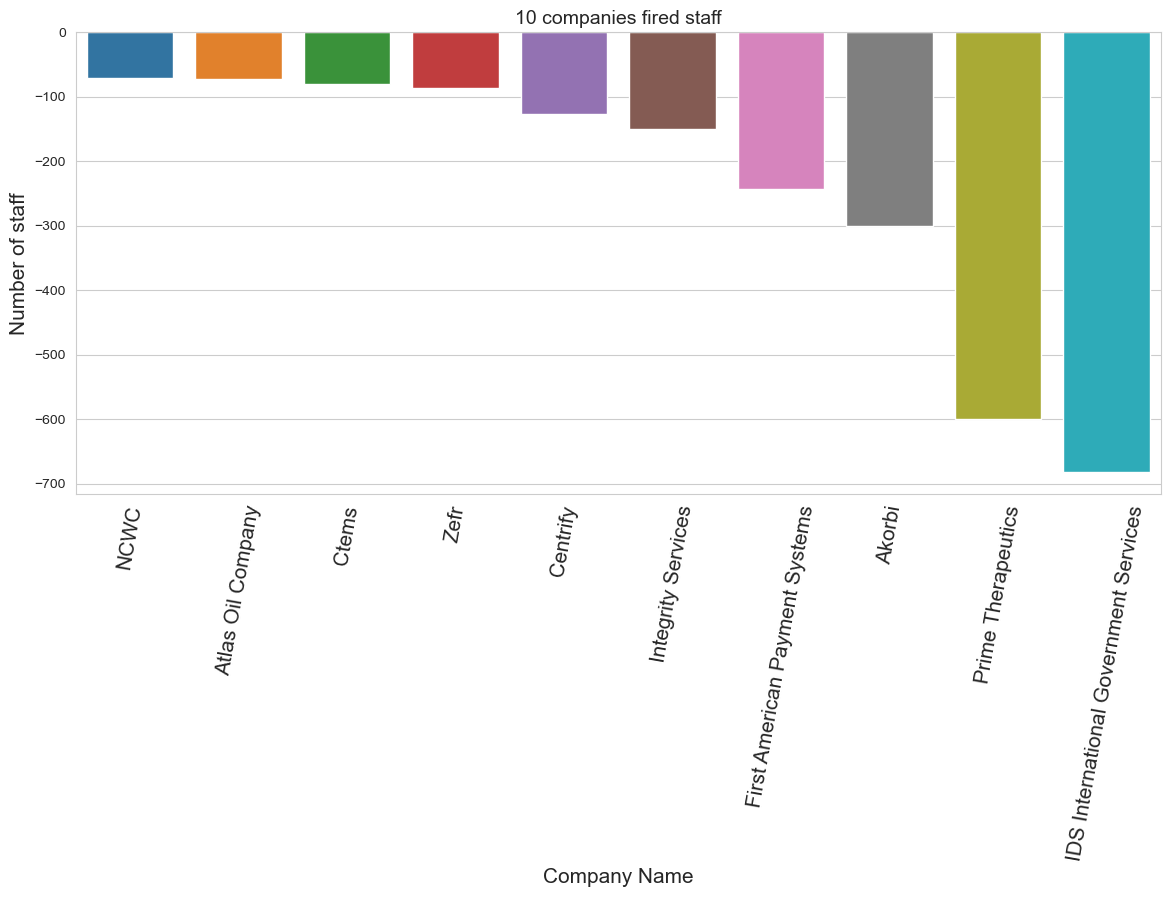

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
sns.barplot(x=bottom10_layoff_staff.index, y=bottom10_layoff_staff.values)
plt.title("10 companies fired staff",fontsize=14)
plt.ylabel('Number of staff',fontsize=15)
plt.xlabel('Company Name',fontsize=15)
plt.xticks(rotation=80,fontsize=15)
plt.show()

####  "Allied Universal" hired the maximum 118531 people in the last year whereas "IDS International Government Services" fired their 682 employees.

## Did any companies increase revenue while reducing staff?

In [39]:
df[(df["workers_difference"]<0)][["name","growth_%","workers_difference"]].sort_values(by="workers_difference",ascending = True)

name  growth_%  workers_difference
4567  IDS International Government Services   64.0436              -682.0
1076                     Prime Therapeutics  390.5654              -600.0
4409                                 Akorbi   68.1185              -300.0
4136         First American Payment Systems   77.1276              -243.0
4270                     Integrity Services   72.2406              -150.0
...                                     ...       ...                 ...
2966                          Alpha Premier  126.3750                -1.0
3194                             Rabbit Air  114.9680                -1.0
3799                          Cuddle Clones   88.4597                -1.0
4657                               Klemchuk   61.6037                -1.0
4258                      SBS CyberSecurity   72.5545                -1.0

[94 rows x 3 columns]

In [40]:
layoff_and_revenue = df[(df["workers_difference"]<0)][["name","growth_%","workers_difference"]].sort_values(by="workers_difference",ascending = True).head(25)

In [41]:
layoff_and_revenue

name  growth_%  workers_difference
4567  IDS International Government Services   64.0436              -682.0
1076                     Prime Therapeutics  390.5654              -600.0
4409                                 Akorbi   68.1185              -300.0
4136         First American Payment Systems   77.1276              -243.0
4270                     Integrity Services   72.2406              -150.0
4153                               Centrify   76.4500              -127.0
3627                                   Zefr   96.5302               -86.0
4583                                  Ctems   63.6505               -80.0
4979                      Atlas Oil Company   53.0161               -73.0
2715                                   NCWC  142.2609               -71.0
3784                     Selling Simplified   89.0959               -62.0
4571                             Netsertive   63.9256               -54.0
4675                             RebelMouse   61.2127               -54.0
4942              Green Mountain Technology   54.2047               -48.0
525                       Quantico Tactical  831.3181               -43.0
3848                            Kung Fu Tea   86.7875               -39.0
4154                     Accelerated Claims   76.3999               -30.0
2955                  Buzz Franchise Brands  126.9201               -28.0
5001                     Smart Energy Today   52.5381               -27.0
534                                   Peaxy  817.2645               -26.0
4440                          Hasko Trading   67.2422               -24.0
4167                             CommerceIQ   75.7887               -22.0
1602                                 Taulia  257.0561               -22.0
3404                         Fora Financial  104.7276               -20.0
1833                         Perfect Snacks  222.6079               -16.0

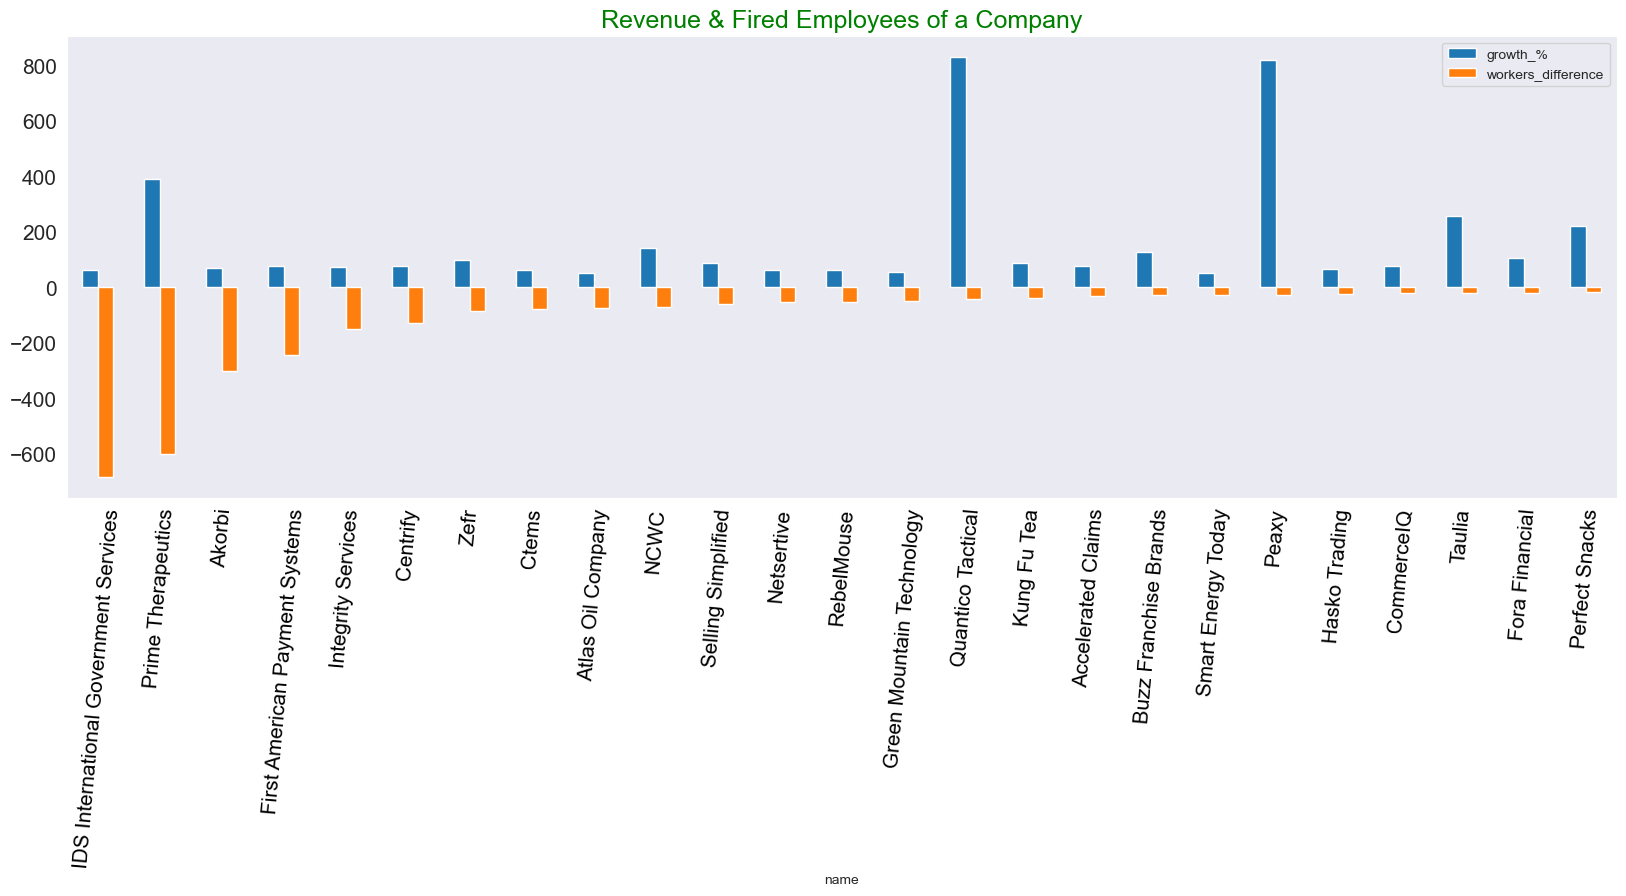

In [42]:
sns.set_style("dark")
layoff_and_revenue.plot(x="name",y=["growth_%","workers_difference"],kind="bar",figsize=(20,6))
plt.title("Revenue & Fired Employees of a Company",fontsize=18 ,color = "green")
plt.xticks(rotation=85,fontsize=15,color="black")
plt.yticks(fontsize=15)
plt.show()

### "Prime Therapeutics" is a company which after lossing 600 employees, still able to acheive the growth rate of 390% .  

## Do you notice any interesting geographic trends?

In [43]:
df['city'].value_counts().head(30)

New York          165
Chicago           110
Atlanta           101
Austin             87
Houston            84
Dallas             74
San Diego          71
San Francisco      52
Los Angeles        51
Denver             48
Tampa              44
Miami              39
Washington         38
Portland           37
Charlotte          36
Arlington          36
Minneapolis        36
Seattle            35
Boston             33
Phoenix            33
Richmond           30
Philadelphia       27
Orlando            26
Indianapolis       26
Irvine             25
Scottsdale         24
Huntsville         24
Salt Lake City     23
Alpharetta         23
Las Vegas          22
Name: city, dtype: int64

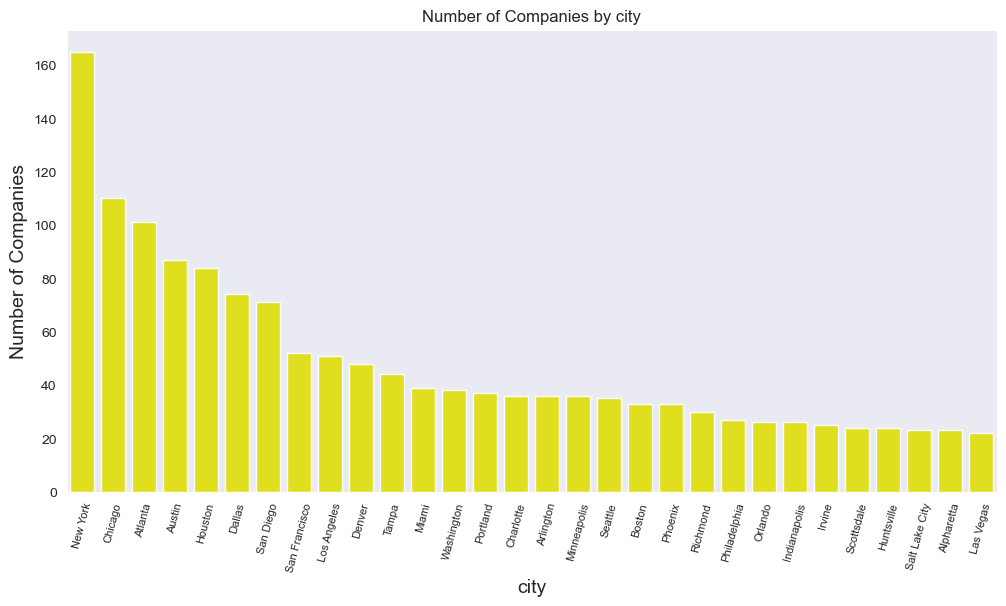

In [44]:
city_counts = df['city'].value_counts().head(30)
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.index, y= city_counts.values, color='yellow')
plt.title('Number of Companies by city')
plt.xlabel('city',fontsize=14)
plt.ylabel('Number of Companies',fontsize=14)
plt.xticks(rotation=75,fontsize=8)
plt.show()

In [45]:
df['state'].value_counts()

CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: state, dtype: int64

In [46]:
import plotly.express as px

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.choropleth(state_counts, locationmode="USA-states", locations="state", color="count",
                    scope="usa", title='Number of Companies by State')
fig.show()


#### "California" is the state having 712 companies situated and "New York" is the city having maximum 162 companies located there 

## State having maximum companies in Top 1000 


In [47]:
top_1000 =df[df["rank"]<1001]

In [48]:
top_1000["state"].value_counts()

CA    170
TX     82
NY     79
FL     78
VA     62
GA     44
IL     43
MD     36
CO     34
PA     28
UT     28
NC     26
WA     23
NJ     22
OH     21
MI     19
AZ     18
MA     16
TN     15
IN     13
MO     13
SC     12
AL     11
MN     11
ID     11
DC     10
LA      9
WI      8
OR      6
CT      6
NV      6
NE      6
KS      5
KY      5
ME      4
ND      3
IA      3
DE      2
AR      2
OK      2
WY      2
PR      2
MT      2
NH      2
NM      1
SD      1
Name: state, dtype: int64

In [49]:
top_1000_counts=top_1000["state"].value_counts()

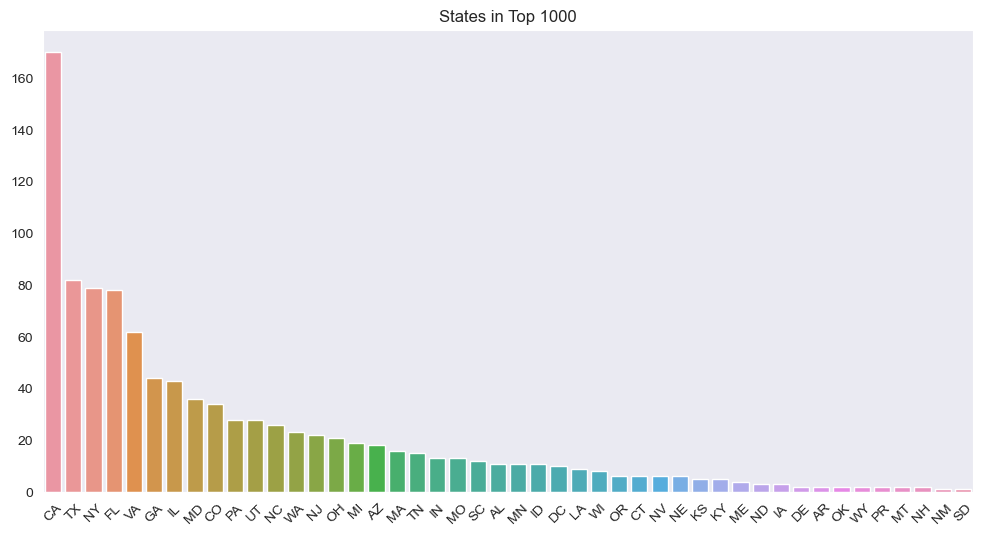

In [50]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
sns.barplot(x=top_1000_counts.index, y=top_1000_counts.values)
plt.title("States in Top 1000")
plt.xticks(rotation=45)
plt.show()

#### In the top 1000 comapanies, maximum 170 companies are located at "CALIFORNIA"

### Companies Appeared in INC5000 list multiple times

In [51]:
df[(df["yrs_on_list"]>4)][["name","founded","growth_%","yrs_on_list"]].sort_values(by="yrs_on_list",ascending =False)

name  founded  growth_%  yrs_on_list
3202                        WMK     1997  114.5471           14
4985    Pacific Dental Services     1994   52.9105           14
4348               G&A Partners     1995   69.9973           14
4620    Total Quality Logistics     1997   62.6468           14
4041  Jarrett Logistics Systems     1999   80.3107           14
...                         ...      ...       ...          ...
3334                    Geocent     1992  107.7614            5
3326                        MRO     2013  108.4007            5
3321                   BioPoint     2011  108.6308            5
3303                      Arcos     1997  109.6134            5
5006     Golden Star Technology     1985   52.3467            5

[889 rows x 4 columns]

In [52]:
multiple = df[(df["yrs_on_list"]>4)][["name","founded","growth_%","yrs_on_list"]].sort_values(by="yrs_on_list",ascending =False).head(25)

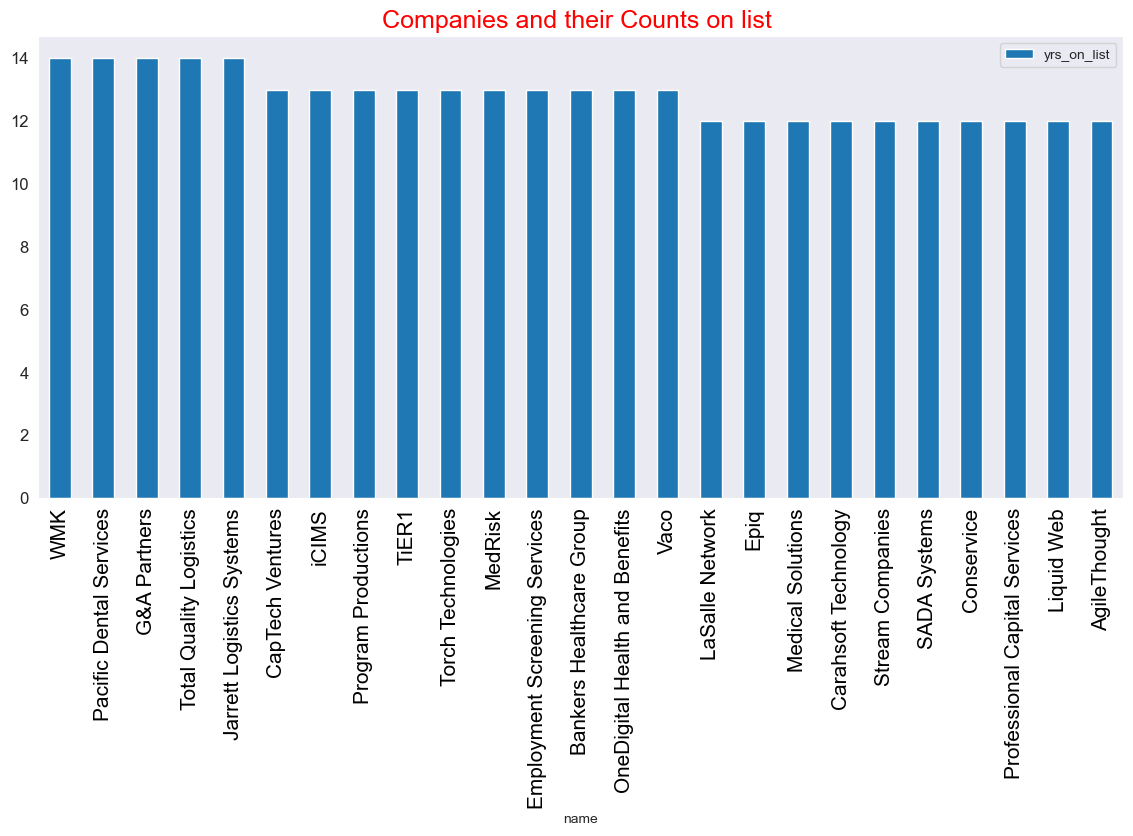

In [53]:
sns.set_style("dark")
multiple.plot(x="name",y=["yrs_on_list"],kind="bar",figsize=(14,6))
plt.title("Companies and their Counts on list ",fontsize=18 ,color = "red")
plt.xticks(fontsize=15,color="black")
plt.yticks(fontsize=12)
plt.show()

#### There are 894 companies which are apperaing in the list for 5 or more than 5 times.
#### "WMK","Pacific Dental Services","G&A Partners","Total Quality Logistics","Jarrett Logistics Systems" are the 5 companies which are appered for the 14 times in the list.